/tmp/ipykernel_121/1216705357.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IntMig_NA['Group'] = 'Major_Area'
/tmp/ipykernel_121/1216705357.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IntMig_NA['Major_Area'] = 'Major_Area'


['Northern America' 'Africa' 'Asia' 'Europe'
 'Latin America and the Caribbean' 'Oceania']


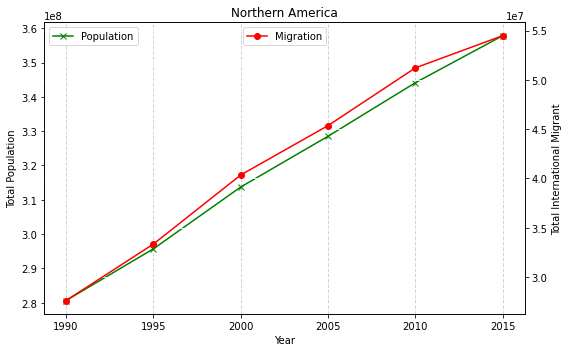

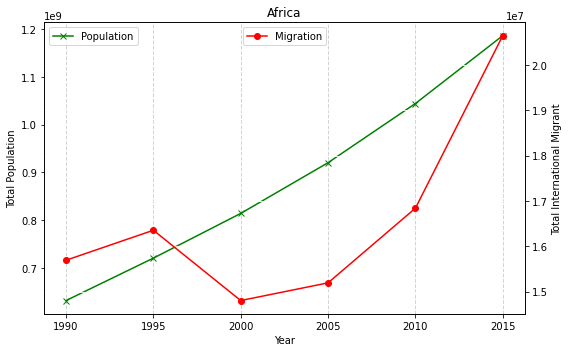

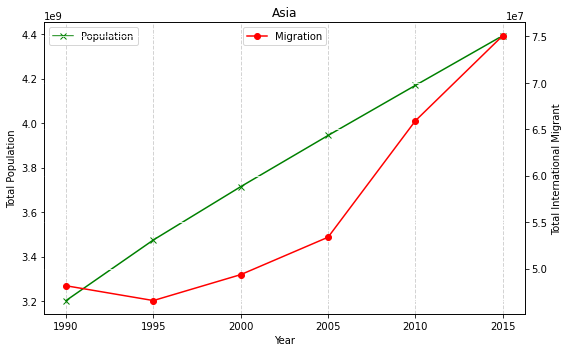

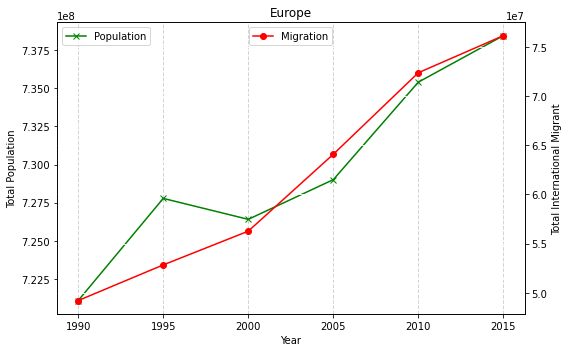

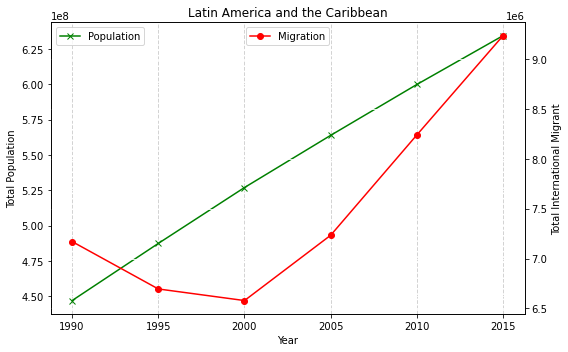

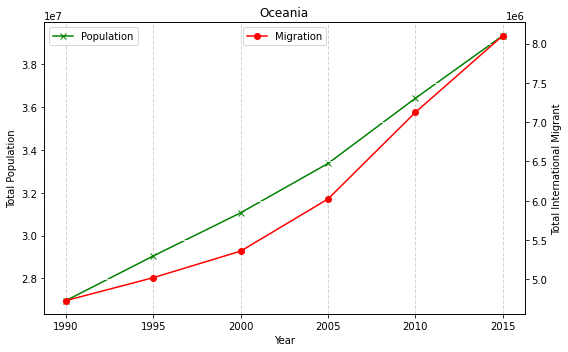

In [37]:
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from  matplotlib.ticker import PercentFormatter

Dataset_1 = pd.read_csv('./Dataset_1.csv')
Dataset_2 = pd.read_csv('./Dataset_2.csv')
Annex = pd.read_csv('./Annex.csv')


IntMig_Country = pd.merge(Dataset_1,Annex,on='Code')
IntMig_NA = IntMig_Country[(IntMig_Country['Group'] == 'Region') &  (IntMig_Country['Region'] == 'Northern America')]
IntMig_NA['Group'] = 'Major_Area'
IntMig_NA['Major_Area'] = 'Major_Area'
Frame = [IntMig_NA,IntMig_Country]
IntMig_Country = pd.concat(Frame)


# Migration as the Rate of Population

IntMig_Country = IntMig_Country[(IntMig_Country['Group'] == 'Major_Area') & (IntMig_Country['Gender'] == 'T')]
#IntMig = IntMig_Country[['Title','Year','Table_2','Table_1','Table_3','Table_6_Est']]
IntMig = IntMig_Country[['Year','Table_1','Title','Table_2','Major_Area']]

print(IntMig['Title'].unique())
for t in IntMig['Title'].unique():
#    sns.set_theme(style="ticks")
    df1 =IntMig[(IntMig['Title'] == t)] 
    fig, ax = plt.subplots(figsize=(8,5))
    ax2 = ax.twinx()
    ax.plot(df1['Year'], df1['Table_2'], color='green', marker='x')
#    ax.set_ylim([5000000, 7000000000])
    ax2.plot(df1['Year'], df1['Table_1'], color='red', marker='o')
#    ax2.set_ylim([5000000, 7000000000])
    ax.set_title( t)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Population')
    ax2.set_ylabel('Total International Migrant')
    ax.legend(['Population'])
    ax2.legend(['Migration'], loc='upper center')
    ax.set_xticks(df1['Year'])
    ax.set_xticklabels(df1['Year'], rotation=0)
    ax.yaxis.grid(color='white')
    ax.xaxis.grid(color = 'lightgrey', linestyle ='--',linewidth=1)
    ax2.yaxis.grid(color='white')
    plt.tight_layout()
    plt.show()
